# Starting notebook with DESI target catalogue

Data model is here: https://desidatamodel.readthedocs.io/en/latest/DESI_TARGET/TARG_DIR/DR/VERSION/TYPE/PHASE/RESOLVE/OBSCON/PHASEtargets-OBSCON-RESOLVE-hp-HP.html


In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import sys, os

import seaborn as sns
sns.set()

#routines to read in target file
from desitarget.io import read_targets_in_hp, read_targets_in_box, read_targets_in_cap, check_hp_target_dir

#load the bit maks dictionaries
from desitarget.targets import desi_mask, bgs_mask, mws_mask
from astropy.table import Table

def flux_to_mag(flux):
    mag = 22.5 - 2.5*np.log10(flux)
    return mag


In [6]:
import desitarget
desitarget.io._get_targ_dir()

'/global/cfs/cdirs/desi/target/catalogs'

In [8]:
#directory with target catalogue
#hpdirname = '/project/projectdirs/desi/target/catalogs/dr8/0.31.1/targets/main/resolve'
hpdirname = '/global/cfs/cdirs/desi/target/catalogs/dr9/0.47.0/targets/main/resolve/bright'

#hpdirname=desitarget.io._get_targ_dir()
#use this to check the properties of the hp directory
nside, pixdict = check_hp_target_dir(hpdirname)

#Load full DR8 target catalogue. Choose only a few columns!
columns = ['RA', 'DEC', "DESI_TARGET", "TARGETID","BGS_TARGET", 
           "FLUX_R", "MW_TRANSMISSION_R", "FIBERFLUX_R",
           "FLUX_Z", "MW_TRANSMISSION_Z", "FIBERFLUX_Z",
           "FLUX_G", "MW_TRANSMISSION_G", "FIBERFLUX_G"]
mastertargs = read_targets_in_hp(hpdirname=hpdirname, nside=nside, 
                               pixlist=np.array(list(pixdict.keys())), columns=columns)

print('# rows = %i' %(len(mastertargs)))
print('# cols = %i' %(len(mastertargs.dtype.names)))

# rows = 65718954
# cols = 14


In [9]:
#DESI target classes
isELG = (mastertargs["DESI_TARGET"] & desi_mask["ELG"]) != 0
isQSO = (mastertargs["DESI_TARGET"] & desi_mask["QSO"]) != 0
isLRG = (mastertargs["DESI_TARGET"] & desi_mask["LRG"]) != 0
isBGS = (mastertargs["DESI_TARGET"] & desi_mask["BGS_ANY"]) != 0

In [10]:
#BGS main target classes
bgs_bright = (mastertargs["BGS_TARGET"] & bgs_mask["BGS_BRIGHT"]) != 0
bgs_faint = (mastertargs["BGS_TARGET"] & bgs_mask["BGS_FAINT"]) != 0
bgs_wise = (mastertargs["BGS_TARGET"] & bgs_mask["BGS_WISE"]) != 0

In [11]:
# Getting the model magnitudes corrected for extinction
rmag = flux_to_mag(mastertargs[isBGS]['FLUX_R']/mastertargs[isBGS]['MW_TRANSMISSION_R'])
gmag = flux_to_mag(mastertargs[isBGS]['FLUX_G']/mastertargs[isBGS]['MW_TRANSMISSION_G'])
zmag = flux_to_mag(mastertargs[isBGS]['FLUX_Z']/mastertargs[isBGS]['MW_TRANSMISSION_Z'])

<ipython-input-1-b90e5f1bf907>:17: RuntimeWarning: divide by zero encountered in log10
  mag = 22.5 - 2.5*np.log10(flux)
<ipython-input-1-b90e5f1bf907>:17: RuntimeWarning: invalid value encountered in log10
  mag = 22.5 - 2.5*np.log10(flux)


In [12]:
# Getting the fiber magnitudes corrected for extinction
rfib = flux_to_mag(mastertargs[isBGS]['FIBERFLUX_R']/mastertargs[isBGS]['MW_TRANSMISSION_R'])
gfib = flux_to_mag(mastertargs[isBGS]['FIBERFLUX_G']/mastertargs[isBGS]['MW_TRANSMISSION_G'])
zfib = flux_to_mag(mastertargs[isBGS]['FIBERFLUX_Z']/mastertargs[isBGS]['MW_TRANSMISSION_Z'])

<ipython-input-1-b90e5f1bf907>:17: RuntimeWarning: divide by zero encountered in log10
  mag = 22.5 - 2.5*np.log10(flux)


Text(0, 0.5, 'N')

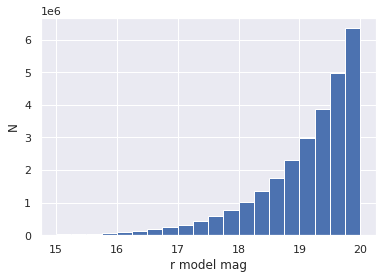

In [13]:
#testing the TS - we should expect a sharp cut-off at r~20 mag.
x=plt.hist(rmag, bins=20, range=(15,20))
plt.xlabel('r model mag')
plt.ylabel('N')